In [829]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
sns.set()

In [830]:
X_,y_=load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X_,y_,test_size=0.1)
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2)
y_train,y_test,y_val = y_train.reshape(-1,1),y_test.reshape(-1,1),y_val.reshape(-1,1)
print("X_train shape:{} - y_train shape:{}".format(X_train.shape,y_train.shape))
print("X_val shape:{} - y_val shape:{}".format(X_val.shape,y_val.shape))
print("X_test shape:{} - y_test shape:{}".format(X_test.shape,y_test.shape))

X_train shape:(409, 30) - y_train shape:(409, 1)
X_val shape:(103, 30) - y_val shape:(103, 1)
X_test shape:(57, 30) - y_test shape:(57, 1)


In [831]:
def logistic_regression(X_train,y_train,X_val,y_val,epochs,lr=0.000001):
    w,b= initialize_weights((X_train.shape[1],1))
    cache={"cost":[],"accuracy":[]}
    for iteration in range(epochs) : 
        gradient_w,gradient_b = compute_gradient(X_train,y_train,w,b)
        w = w - lr * gradient_w
        b = b - lr * gradient_b
        cost = loss(X_train,y_train,w,b)
        y_val_pred = predict(X_val,w,b)
        accuracy= accuracy_score(y_val,np.round(y_val_pred))
        cache["cost"].append(cost)
        cache["accuracy"].append(accuracy)
        print("epoch{} - loss:{} , validation accuracy:{}".format(iteration+1,cost,accuracy))
    return w,b,cache
        

In [832]:
def initialize_weights(dim) : 
    return np.zeros(dim),0

In [833]:
sigmoid = lambda x : 1/(1+np.exp(-x))

In [834]:
def compute_gradient(X,y,w,b) : 
    m=X.shape[0]
    z=(X@w)+b
    a = sigmoid(z)
    gradient_w = (X.T@(a-y))/m
    gradient_b = np.sum(a-y)/m
    return gradient_w , gradient_b

In [835]:
def loss(X,y,w,b) : 
    epsilon = 1e-1
    a=sigmoid(X@w+b)
    return -np.sum((np.multiply(y,np.log(a+epsilon))+np.multiply((1-y),np.log(1-a-epsilon))))/X.shape[0]

In [836]:
def predict(X,w,b) : 
    z=X@w+b
    a=sigmoid(z)
    return a

In [837]:
w,b,h = logistic_regression(X_train,y_train,X_val,y_val,epochs=1000)

epoch1 - loss:0.6462546589571246 , validation accuracy:0.3106796116504854
epoch2 - loss:0.6336097111844252 , validation accuracy:0.3106796116504854
epoch3 - loss:0.6273325157703696 , validation accuracy:0.3106796116504854
epoch4 - loss:0.6238290237105987 , validation accuracy:0.3106796116504854
epoch5 - loss:0.6216657765592557 , validation accuracy:0.3106796116504854
epoch6 - loss:0.6202030355660195 , validation accuracy:0.3106796116504854
epoch7 - loss:0.6191275841793633 , validation accuracy:0.3106796116504854
epoch8 - loss:0.6182747908166248 , validation accuracy:0.3106796116504854
epoch9 - loss:0.6175535598124077 , validation accuracy:0.3106796116504854
epoch10 - loss:0.6169116638035014 , validation accuracy:0.3106796116504854
epoch11 - loss:0.6163184414670282 , validation accuracy:0.3106796116504854
epoch12 - loss:0.6157556108817819 , validation accuracy:0.3106796116504854
epoch13 - loss:0.6152121604374926 , validation accuracy:0.3106796116504854
epoch14 - loss:0.6146814127135802 

epoch222 - loss:0.5396372244995299 , validation accuracy:0.7184466019417476
epoch223 - loss:0.5393774032215902 , validation accuracy:0.7281553398058253
epoch224 - loss:0.5391182316081438 , validation accuracy:0.7281553398058253
epoch225 - loss:0.5388597067914128 , validation accuracy:0.7281553398058253
epoch226 - loss:0.5386018259225058 , validation accuracy:0.7281553398058253
epoch227 - loss:0.5383445861712486 , validation accuracy:0.7281553398058253
epoch228 - loss:0.5380879847260163 , validation accuracy:0.7281553398058253
epoch229 - loss:0.5378320187935672 , validation accuracy:0.7281553398058253
epoch230 - loss:0.5375766855988806 , validation accuracy:0.7281553398058253
epoch231 - loss:0.5373219823849932 , validation accuracy:0.7281553398058253
epoch232 - loss:0.5370679064128399 , validation accuracy:0.7281553398058253
epoch233 - loss:0.5368144549610949 , validation accuracy:0.7281553398058253
epoch234 - loss:0.5365616253260164 , validation accuracy:0.7281553398058253
epoch235 - l

epoch435 - loss:0.49555916381227966 , validation accuracy:0.9223300970873787
epoch436 - loss:0.49539338160281343 , validation accuracy:0.9223300970873787
epoch437 - loss:0.49522789708693343 , validation accuracy:0.9223300970873787
epoch438 - loss:0.4950627093450076 , validation accuracy:0.9223300970873787
epoch439 - loss:0.494897817461413 , validation accuracy:0.9223300970873787
epoch440 - loss:0.49473322052451213 , validation accuracy:0.9223300970873787
epoch441 - loss:0.4945689176266288 , validation accuracy:0.9223300970873787
epoch442 - loss:0.4944049078640246 , validation accuracy:0.9223300970873787
epoch443 - loss:0.4942411903368763 , validation accuracy:0.9223300970873787
epoch444 - loss:0.49407776414925214 , validation accuracy:0.9223300970873787
epoch445 - loss:0.4939146284090885 , validation accuracy:0.9223300970873787
epoch446 - loss:0.49375178222816835 , validation accuracy:0.9223300970873787
epoch447 - loss:0.4935892247220971 , validation accuracy:0.912621359223301
epoch448

epoch675 - loss:0.46263977836508186 , validation accuracy:0.912621359223301
epoch676 - loss:0.46252581303566515 , validation accuracy:0.912621359223301
epoch677 - loss:0.46241200222737516 , validation accuracy:0.912621359223301
epoch678 - loss:0.46229834556086336 , validation accuracy:0.912621359223301
epoch679 - loss:0.4621848426579676 , validation accuracy:0.912621359223301
epoch680 - loss:0.46207149314170887 , validation accuracy:0.912621359223301
epoch681 - loss:0.4619582966362849 , validation accuracy:0.912621359223301
epoch682 - loss:0.46184525276706595 , validation accuracy:0.912621359223301
epoch683 - loss:0.4617323611605898 , validation accuracy:0.912621359223301
epoch684 - loss:0.4616196214445562 , validation accuracy:0.912621359223301
epoch685 - loss:0.4615070332478223 , validation accuracy:0.912621359223301
epoch686 - loss:0.461394596200398 , validation accuracy:0.912621359223301
epoch687 - loss:0.4612823099334409 , validation accuracy:0.912621359223301
epoch688 - loss:0.46

epoch910 - loss:0.4394197292534186 , validation accuracy:0.9223300970873787
epoch911 - loss:0.4393336875198783 , validation accuracy:0.9223300970873787
epoch912 - loss:0.43924773576360515 , validation accuracy:0.9223300970873787
epoch913 - loss:0.4391618737901472 , validation accuracy:0.9223300970873787
epoch914 - loss:0.43907610140557646 , validation accuracy:0.9223300970873787
epoch915 - loss:0.43899041841648867 , validation accuracy:0.9223300970873787
epoch916 - loss:0.4389048246300014 , validation accuracy:0.9223300970873787
epoch917 - loss:0.4388193198537528 , validation accuracy:0.9223300970873787
epoch918 - loss:0.43873390389590033 , validation accuracy:0.9223300970873787
epoch919 - loss:0.43864857656511935 , validation accuracy:0.9223300970873787
epoch920 - loss:0.43856333767060185 , validation accuracy:0.9223300970873787
epoch921 - loss:0.4384781870220547 , validation accuracy:0.9223300970873787
epoch922 - loss:0.4383931244296992 , validation accuracy:0.9223300970873787
epoch9

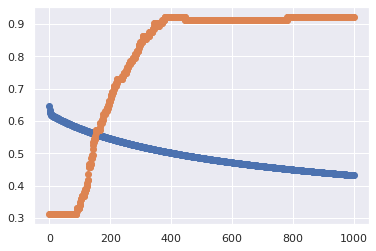

In [839]:
plt.scatter(range(1000),h["cost"])
plt.scatter(range(1000),h["accuracy"])

In [760]:
h

{'cost': [0.8010875412958124,
  1.1411277004784184,
  1.7391687983385886,
  0.7455207478893258,
  1.1674168437816304,
  1.094816752251165,
  1.7087000523052134,
  0.7072711745001355,
  1.0735782506754807,
  1.0770871490587501,
  1.686329309109633,
  0.6713586535339403,
  0.967923788413999,
  1.0551929380005591,
  1.6571155820608443,
  0.6443804889006924,
  0.8893974290837565,
  1.0141146096547715,
  1.6113504117038453,
  0.6283241605256095,
  0.8522510772564759,
  0.9661386066524477,
  1.5506317273796313,
  0.621115774598472,
  0.8448503786539849,
  0.9207746375695752,
  1.4795363145876899,
  0.6205399921329934,
  0.8541068077954995,
  0.8776071293325344,
  1.3990260737138218,
  0.626091596943188,
  0.8746343723790064,
  0.8349228401192035,
  1.3094302830991384,
  0.6373278782852504,
  0.9020795680203744,
  0.7922687449717413,
  1.213505960289705,
  0.6521206380944189,
  0.9290137345920456,
  0.7515469995022512,
  1.1184504636783184,
  0.6656570718927094,
  0.9450270825927166,
  0.7166

In [844]:
y_test_pred = np.round(predict(X_test,w,b))

In [846]:
accuracy_score(y_test,y_test_pred)

0.9298245614035088